```markdown
# Notebook Overview

This notebook analyzes historical stock data for Apple Inc. (AAPL) to identify patterns and trends in weekly stock performance. The workflow includes:

1. **Data Preparation**: Importing and cleaning the dataset, converting dates, and adding derived columns like day of the week and week periods.
2. **Weekly Analysis**: Grouping data by weeks to calculate metrics such as opening prices on Tuesdays and Thursdays, and computing weekly percentage changes (`net%`).
3. **Classification**: Categorizing weeks into "good", "bad", or "flat" based on performance, and analyzing the distribution of these week types.
4. **Streak Analysis**: Identifying streaks of consecutive "good", "bad", or "flat" weeks and visualizing their lengths and chronological order.
5. **Yearly Trends**: Aggregating weekly data to classify years as "good", "bad", or "flat" based on the majority of weekly outcomes.
6. **Visualization**: Using various plots to illustrate distributions, streaks, and trends over time.

The analysis aims to uncover patterns in stock performance and provide insights into historical trends.

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     

In [2]:
apple = pd.read_csv(r"D:\data\aapl.us.txt")

apple.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,AAPL.US,D,19840907,0,0.10122,0.10246,0.10000,0.10122,97236149,0
1,AAPL.US,D,19840910,0,0.10122,0.10153,0.09878,0.10062,75471114,0
2,AAPL.US,D,19840911,0,0.10153,0.10428,0.10153,0.10246,177965367,0
3,AAPL.US,D,19840912,0,0.10246,0.10306,0.09938,0.09938,155467926,0
4,AAPL.US,D,19840913,0,0.10490,0.10520,0.10490,0.10490,242135546,0


In [3]:
apple.isnull().values.any()

False

In [4]:
apple['<DATE>'] = pd.to_datetime(apple['<DATE>'], format="%Y%m%d")
apple.dtypes
apple.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,AAPL.US,D,1984-09-07,0,0.10122,0.10246,0.10000,0.10122,97236149,0
1,AAPL.US,D,1984-09-10,0,0.10122,0.10153,0.09878,0.10062,75471114,0
2,AAPL.US,D,1984-09-11,0,0.10153,0.10428,0.10153,0.10246,177965367,0
3,AAPL.US,D,1984-09-12,0,0.10246,0.10306,0.09938,0.09938,155467926,0
4,AAPL.US,D,1984-09-13,0,0.10490,0.10520,0.10490,0.10490,242135546,0


In [5]:
apple = apple.rename(columns={'<DATE>': 'DATE'})
apple.columns

Index(['<TICKER>', '<PER>', 'DATE', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>',
       '<CLOSE>', '<VOL>', '<OPENINT>'],
      dtype='object')

In [6]:
apple['DayOfWeek'] = apple['DATE'].dt.day_name()
apple.tail()

,<TICKER>,<PER>,DATE,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>,DayOfWeek
9479,AAPL.US,D,2022-04-18,0,163.92,166.5984,163.57,165.07,69023941,0,Monday
9480,AAPL.US,D,2022-04-19,0,165.02,167.8200,163.91,167.40,67723833,0,Tuesday
9481,AAPL.US,D,2022-04-20,0,168.76,168.8800,166.10,167.23,67929814,0,Wednesday
9482,AAPL.US,D,2022-04-21,0,168.91,171.5300,165.91,166.42,87227768,0,Thursday
9483,AAPL.US,D,2022-04-22,0,166.46,167.8699,161.50,161.79,84753396,0,Friday


In [7]:
apple.columns = apple.columns.str.strip().str.strip("<>").str.upper()

In [8]:
apple.head()

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DAYOFWEEK
0,AAPL.US,D,1984-09-07,0,0.10122,0.10246,0.10000,0.10122,97236149,0,Friday
1,AAPL.US,D,1984-09-10,0,0.10122,0.10153,0.09878,0.10062,75471114,0,Monday
2,AAPL.US,D,1984-09-11,0,0.10153,0.10428,0.10153,0.10246,177965367,0,Tuesday
3,AAPL.US,D,1984-09-12,0,0.10246,0.10306,0.09938,0.09938,155467926,0,Wednesday
4,AAPL.US,D,1984-09-13,0,0.10490,0.10520,0.10490,0.10490,242135546,0,Thursday


In [9]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9484 entries, 0 to 9483
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TICKER     9484 non-null   object        
 1   PER        9484 non-null   object        
 2   DATE       9484 non-null   datetime64[ns]
 3   TIME       9484 non-null   int64         
 4   OPEN       9484 non-null   float64       
 5   HIGH       9484 non-null   float64       
 6   LOW        9484 non-null   float64       
 7   CLOSE      9484 non-null   float64       
 8   VOL        9484 non-null   int64         
 9   OPENINT    9484 non-null   int64         
 10  DAYOFWEEK  9484 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 815.2+ KB


In [10]:
apple['weekday'] = apple['DATE'].dt.weekday         # Mon=0 ... Sun=6
apple['week']    = apple['DATE'].dt.to_period('W-MON')

In [11]:
tue_open = (apple.loc[apple['weekday'] == 1]        # Tuesday
                 .groupby('week')['OPEN']
                 .first()
                 .rename('buy_tue_open'))

thu_open = (apple.loc[apple['weekday'] == 3]        # Thursday
                 .groupby('week')['OPEN']
                 .first()
                 .rename('sell_thu_open'))
tue_open.head()

week
1984-09-11/1984-09-17    0.10153
1984-09-18/1984-09-24    0.10918
1984-09-25/1984-10-01    0.10122
1984-10-02/1984-10-08    0.09419
1984-10-09/1984-10-15    0.09481
Freq: W-MON, Name: buy_tue_open, dtype: float64

In [12]:
thu_open.head()

week
1984-09-11/1984-09-17    0.10490
1984-09-18/1984-09-24    0.10336
1984-09-25/1984-10-01    0.09817
1984-10-02/1984-10-08    0.09692
1984-10-09/1984-10-15    0.09112
Freq: W-MON, Name: sell_thu_open, dtype: float64

In [13]:
weekly = pd.concat([tue_open, thu_open], axis=1).dropna()  
weekly['net%'] = ((weekly['sell_thu_open'] / weekly['buy_tue_open']) - 1.0)*100.0
weekly.head()

,buy_tue_open,sell_thu_open,net%
week,,,
1984-09-11/1984-09-17,0.10153,0.10490,3.319216
1984-09-18/1984-09-24,0.10918,0.10336,-5.330647
1984-09-25/1984-10-01,0.10122,0.09817,-3.013238
1984-10-02/1984-10-08,0.09419,0.09692,2.898397
1984-10-09/1984-10-15,0.09481,0.09112,-3.891995


In [14]:
zero_weeks = weekly[weekly['net%'] == 0]
zero_weeks

,buy_tue_open,sell_thu_open,net%
week,,,
1984-10-30/1984-11-05,0.09543,0.09543,0.0
1985-05-07/1985-05-13,0.07647,0.07647,0.0
1985-08-20/1985-08-26,0.05811,0.05811,0.0
1985-08-27/1985-09-02,0.05811,0.05811,0.0
1985-11-12/1985-11-18,0.07647,0.07647,0.0
1986-09-09/1986-09-15,0.13213,0.13213,0.0
1987-03-03/1987-03-09,0.25717,0.25717,0.0
1987-06-23/1987-06-29,0.32050,0.32050,0.0
1988-07-05/1988-07-11,0.35539,0.35539,0.0


In [15]:
weekly['week_type'] = np.where(
    weekly['net%'] > 0, 'good week',
    np.where(weekly['net%'] < 0, 'bad week', 'flat week')
)
weekly.head()   

,buy_tue_open,sell_thu_open,net%,week_type
week,,,,
1984-09-11/1984-09-17,0.10153,0.10490,3.319216,good week
1984-09-18/1984-09-24,0.10918,0.10336,-5.330647,bad week
1984-09-25/1984-10-01,0.10122,0.09817,-3.013238,bad week
1984-10-02/1984-10-08,0.09419,0.09692,2.898397,good week
1984-10-09/1984-10-15,0.09481,0.09112,-3.891995,bad week


In [16]:
weekly.head()

,buy_tue_open,sell_thu_open,net%,week_type
week,,,,
1984-09-11/1984-09-17,0.10153,0.10490,3.319216,good week
1984-09-18/1984-09-24,0.10918,0.10336,-5.330647,bad week
1984-09-25/1984-10-01,0.10122,0.09817,-3.013238,bad week
1984-10-02/1984-10-08,0.09419,0.09692,2.898397,good week
1984-10-09/1984-10-15,0.09481,0.09112,-3.891995,bad week


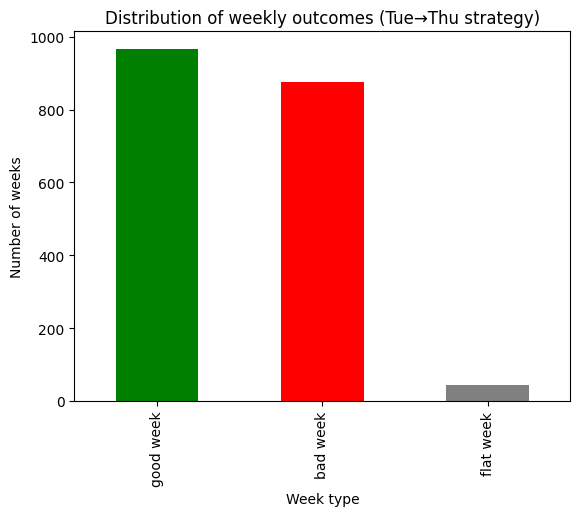

In [17]:
counts = weekly['week_type'].value_counts()

# Plot histogram (bar chart)
counts.plot(kind='bar', color=['green','red','gray'])
plt.xlabel("Week type")
plt.ylabel("Number of weeks")
plt.title("Distribution of weekly outcomes (Tue→Thu strategy)")
plt.show()

In [18]:
counts

week_type
good week    966
bad week     877
flat week     45
Name: count, dtype: int64

good weeks = 51.16% , 
bad weeks = 46.45% ,
flat weeks= 2.38%

In [19]:
weekly_reset = weekly.reset_index()
weekly_reset['week_start'] = weekly_reset['week'].dt.start_time

# Numeric flags
weekly_reset['good_flag'] = (weekly_reset['week_type'] == 'good week').astype(int)
weekly_reset['bad_flag']  = (weekly_reset['week_type'] == 'bad week').astype(int)

# Look forward 52 weeks from each start
results = []
for i in range(len(weekly_reset)):
    start_date = weekly_reset.loc[i, 'week_start']
    end_date   = start_date + pd.Timedelta(weeks=52)

    mask = (weekly_reset['week_start'] >= start_date) & (weekly_reset['week_start'] < end_date)
    good_count = weekly_reset.loc[mask, 'good_flag'].sum()
    bad_count  = weekly_reset.loc[mask, 'bad_flag'].sum()

    if good_count > bad_count:
        label = 'good year'
    elif bad_count > good_count:
        label = 'bad year'
    else:
        label = 'flat year'

    results.append(label)

weekly_reset['year_type'] = results


In [20]:
weekly_reset.head(10)

,week,buy_tue_open,sell_thu_open,net%,week_type,week_start,good_flag,bad_flag,year_type
0,1984-09-11/1984-09-17,0.10153,0.10490,3.319216,good week,1984-09-11,1,0,bad year
1,1984-09-18/1984-09-24,0.10918,0.10336,-5.330647,bad week,1984-09-18,0,1,bad year
2,1984-09-25/1984-10-01,0.10122,0.09817,-3.013238,bad week,1984-09-25,0,1,bad year
3,1984-10-02/1984-10-08,0.09419,0.09692,2.898397,good week,1984-10-02,1,0,bad year
4,1984-10-09/1984-10-15,0.09481,0.09112,-3.891995,bad week,1984-10-09,0,1,bad year
5,1984-10-16/1984-10-22,0.09142,0.09755,6.705316,good week,1984-10-16,1,0,bad year
6,1984-10-23/1984-10-29,0.09908,0.10000,0.928543,good week,1984-10-23,1,0,bad year
7,1984-10-30/1984-11-05,0.09543,0.09543,0.000000,flat week,1984-10-30,0,0,bad year
8,1984-11-06/1984-11-12,0.10000,0.09817,-1.830000,bad week,1984-11-06,0,1,bad year
9,1984-11-13/1984-11-19,0.09174,0.09052,-1.329845,bad week,1984-11-13,0,1,bad year


In [21]:
counts_year = weekly_reset['year_type'].value_counts()
print(counts_year)

year_type
good year    1191
bad year      628
flat year      69
Name: count, dtype: int64


In [22]:
runs = (weekly['week_type'] != weekly['week_type'].shift()).cumsum()
streaks = weekly.groupby([runs]).agg(
    week_type=('week_type','first'),
    length=('week_type','size')
).reset_index(drop=True)
print(streaks.head(10))

   week_type  length
0  good week       1
1   bad week       2
2  good week       1
3   bad week       1
4  good week       2
5  flat week       1
6   bad week       2
7  good week       2
8   bad week       2
9  good week       1


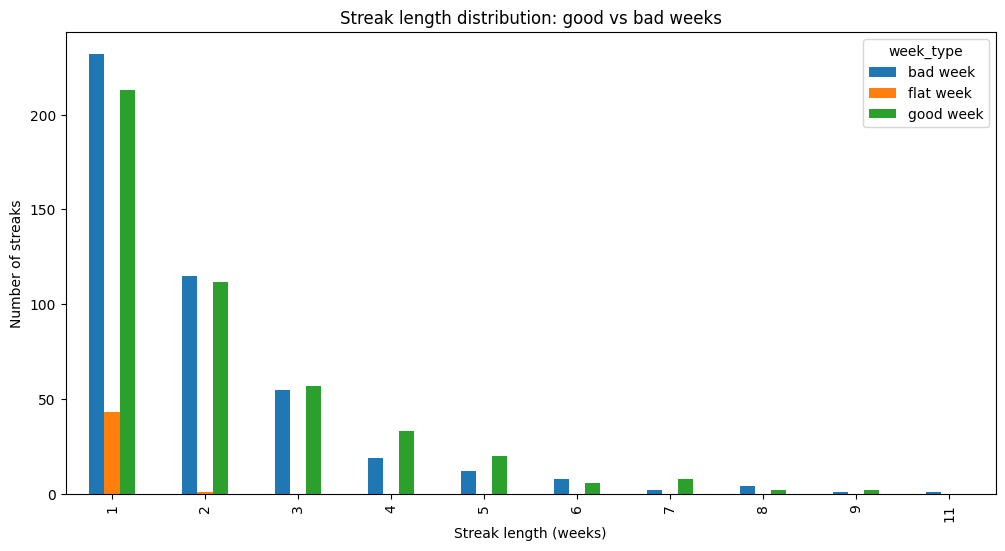

In [23]:
counts = streaks.groupby(['week_type','length']).size().unstack(fill_value=0).T

counts.plot(kind='bar', figsize=(12,6))
plt.xlabel("Streak length (weeks)")
plt.ylabel("Number of streaks")
plt.title("Streak length distribution: good vs bad weeks")
plt.show()


In [24]:
streaks.max()

week_type    good week
length              11
dtype: object

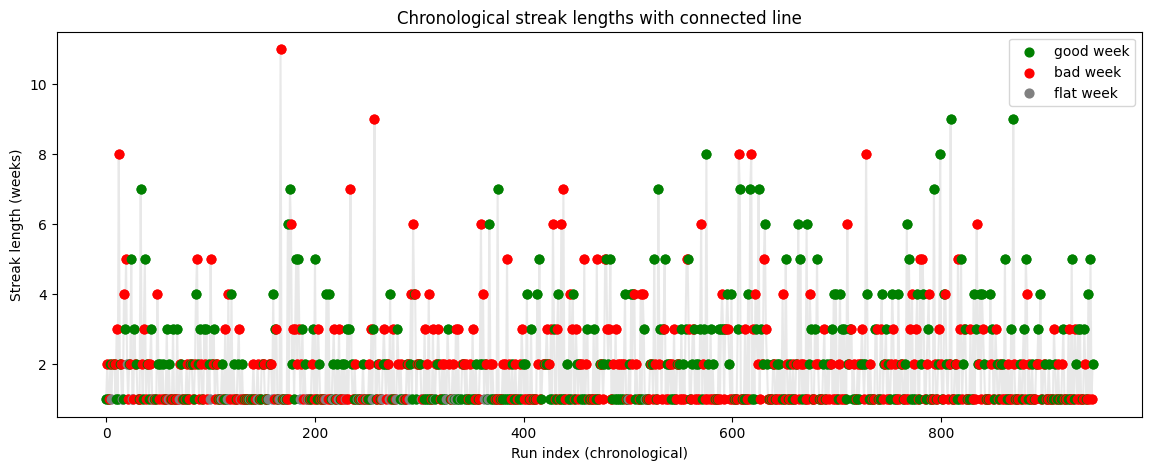

In [25]:
import matplotlib.pyplot as plt

colors = {'good week': 'green', 'bad week': 'red', 'flat week': 'gray'}

plt.figure(figsize=(14,5))

# Continuous line, colour switching by streak type
for i in range(len(streaks)):
    x_vals = [i, i+1]  # from this streak to the next index
    y_vals = [streaks.loc[i, 'length'], streaks.loc[i, 'length']]
    plt.plot(i, streaks.loc[i, 'length'], 
             marker='o', color=colors.get(streaks.loc[i,'week_type'],'blue'))

# Connect with a single line (ignores type for continuity)
plt.plot(streaks.index, streaks['length'], color='lightgray', alpha=0.5, zorder=0)

# Add coloured points
for t in streaks['week_type'].unique():
    sub = streaks[streaks['week_type'] == t]
    plt.scatter(sub.index, sub['length'], color=colors.get(t,'blue'), label=t, s=40)

plt.xlabel("Run index (chronological)")
plt.ylabel("Streak length (weeks)")
plt.title("Chronological streak lengths with connected line")
plt.legend()
plt.show()


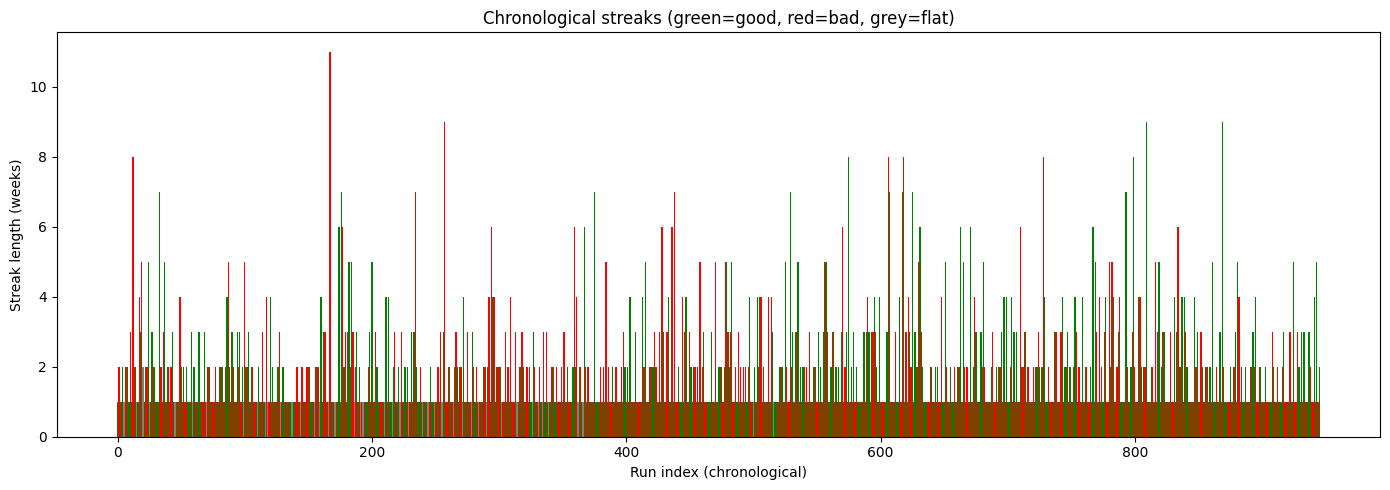

In [26]:
import matplotlib.pyplot as plt

# define colours for each streak type
colors = {'good week': 'green', 'bad week': 'red', 'flat week': 'gray'}

plt.figure(figsize=(14,5))

plt.bar(
    streaks.index,                      # x = streak order
    streaks['length'],                  # y = streak length
    color=[colors[t] for t in streaks['week_type']],  # colour code
    width=1.0, edgecolor='none'
)

plt.xlabel("Run index (chronological)")
plt.ylabel("Streak length (weeks)")
plt.title("Chronological streaks (green=good, red=bad, grey=flat)")
plt.tight_layout()
plt.show()


In [27]:
weekly_reset1 = weekly.reset_index()
weekly_reset1['run_id'] = (weekly_reset1['week_type'] != weekly_reset1['week_type'].shift()).cumsum()


streaks = weekly_reset1.groupby(['run_id','week_type']).size().reset_index(name='length')
streak_start = weekly_reset1.groupby('run_id')['week'].first().reset_index()

streaks = streaks.merge(streak_start, on='run_id', how='left')

streaks['week_start'] = streaks['week'].dt.start_time


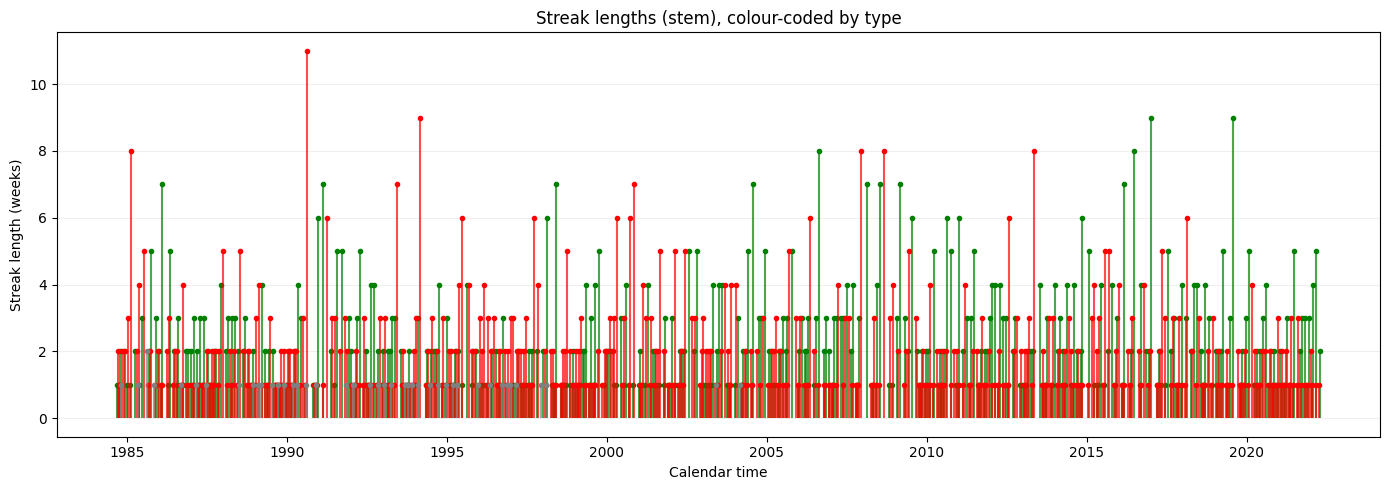

In [28]:
plt.figure(figsize=(14,5))
for t, c in colors.items():
    sub = streaks[streaks['week_type']==t]
    plt.vlines(sub['week_start'], 0, sub['length'], color=c, alpha=0.7, linewidth=1.5)
    plt.plot(sub['week_start'], sub['length'], 'o', color=c, ms=3)

plt.xlabel("Calendar time"); plt.ylabel("Streak length (weeks)")
plt.title("Streak lengths (stem), colour-coded by type")
plt.grid(axis='y', alpha=0.2)
plt.tight_layout(); plt.show()


In [29]:
# find the max streak length overall
max_len = streaks['length'].max()
longest_streaks = streaks[streaks['length'] == max_len]

print("Longest streak(s):")
print(longest_streaks[['week_type','length','week_start']])


Longest streak(s):
    week_type  length week_start
167  bad week      11 1990-08-14


In [30]:
# Show weeks with streaks sorted by streak length in descending order
streaks_sorted = streaks.sort_values(by='length', ascending=False)
print(streaks_sorted[['week_type', 'length', 'week', 'week_start']])

     week_type  length                   week week_start
167   bad week      11  1990-08-14/1990-08-20 1990-08-14
869  good week       9  2019-07-23/2019-07-29 2019-07-23
257   bad week       9  1994-03-01/1994-03-07 1994-03-01
809  good week       9  2017-01-03/2017-01-09 2017-01-03
799  good week       8  2016-06-21/2016-06-27 2016-06-21
..         ...     ...                    ...        ...
574   bad week       1  2006-08-08/2006-08-14 2006-08-08
237  good week       1  1993-08-17/1993-08-23 1993-08-17
571  good week       1  2006-06-20/2006-06-26 2006-06-20
239  good week       1  1993-09-07/1993-09-13 1993-09-07
0    good week       1  1984-09-11/1984-09-17 1984-09-11

[946 rows x 4 columns]


In [31]:
average_streak_length = streaks['length'].mean()
print(f"Average streak length: {average_streak_length:.2f} weeks")

Average streak length: 2.00 weeks


In [32]:
average_good_week_streak = streaks[streaks['week_type'] == 'good week']['length'].mean()
print(f"Average length of good week streaks: {average_good_week_streak:.2f} weeks")

Average length of good week streaks: 2.13 weeks


In [33]:
average_bad_week_streak = streaks[streaks['week_type'] == 'bad week']['length'].mean()
print(f"Average length of bad week streaks: {average_bad_week_streak:.2f} weeks")

Average length of bad week streaks: 1.95 weeks
